# このNotebookについて

このNotebookでは、SPEファイルを回転させる処理の開発(と簡単なテスト)を行います。

# 事前処理

In [1]:
# 図の設定などを導入 ← これはfigure_makerクラスに実装
# 他の設定は？

In [2]:
# 外部ライブラリのimport
import os
import sys

from matplotlib import pyplot as plt

In [3]:
# 自作ライブラリのimport

# ファイル読み込み
from modules.file_format.spe_wrapper import SpeWrapper
# データ処理
from modules.data_model.raw_spectrum_data import RawSpectrumData
# Fittingクラス
from modules.radiation_fitter import RadiationFitter
# 図を作る処理を書いたクラス
from modules.figure_maker import FigureMaker

In [4]:
# 後で消す。こうやってrootを確認する
sys.path

['/Users/ishizawaosamu/work/MasterThesis/RadiationSpectraRotator',
 '/usr/local/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python312.zip',
 '/usr/local/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12',
 '/usr/local/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload',
 '',
 '/Users/ishizawaosamu/work/MasterThesis/RadiationSpectraRotator/.venv/lib/python3.12/site-packages']

# テストデータの読み込み

In [5]:
# 生の露光データファイルの場所
path_to_data = '/Users/ishizawaosamu/work/MasterThesis/test-data/spe-rotator/OIbDia04_  02.spe'

# コピー後のファイル名に使う名前部分を取得
filename = path_to_data.split(".")[0].split('/')[-1]
filename

'OIbDia04_  02'

In [6]:
# データのインスタンス化
original_spe = SpeWrapper(path_to_data) # ファイル読み込み
original_radiation = RawSpectrumData(original_spe) # ファイルデータをデータモデルに格納

In [7]:
# 実験設定メタデータの閲覧
settings = original_spe.retrieve_all_experiment_settings()

for setting in settings:
    print(setting.setting_name, setting.setting_value)

CAMERA_MODEL ProEM-HS: 512B eXcelon
SERIAL_NUMBER 01458418
SENSOR_INFORMATION E2V 512 x 512 (CCD 97)(B)(eXcelon)
PIXEL_PITCH 16.0
SENSOR_TEMPERATURE -64.0
EXPOSURE_TIME 10.0
READOUT_TIME 16.798374999999997
ADC_SPEED 20.0
BIT_DEPTH 16
ADC_ANALOG_GAIN High


## 露光データの全体を俯瞰する

In [8]:
all_max_I = original_radiation.get_max_intensity_arr()
up_max_I, down_max_I = original_radiation.get_separated_max_intensity_arr()

In [20]:
original_spe.roi_list[0].height

np.uint64(512)

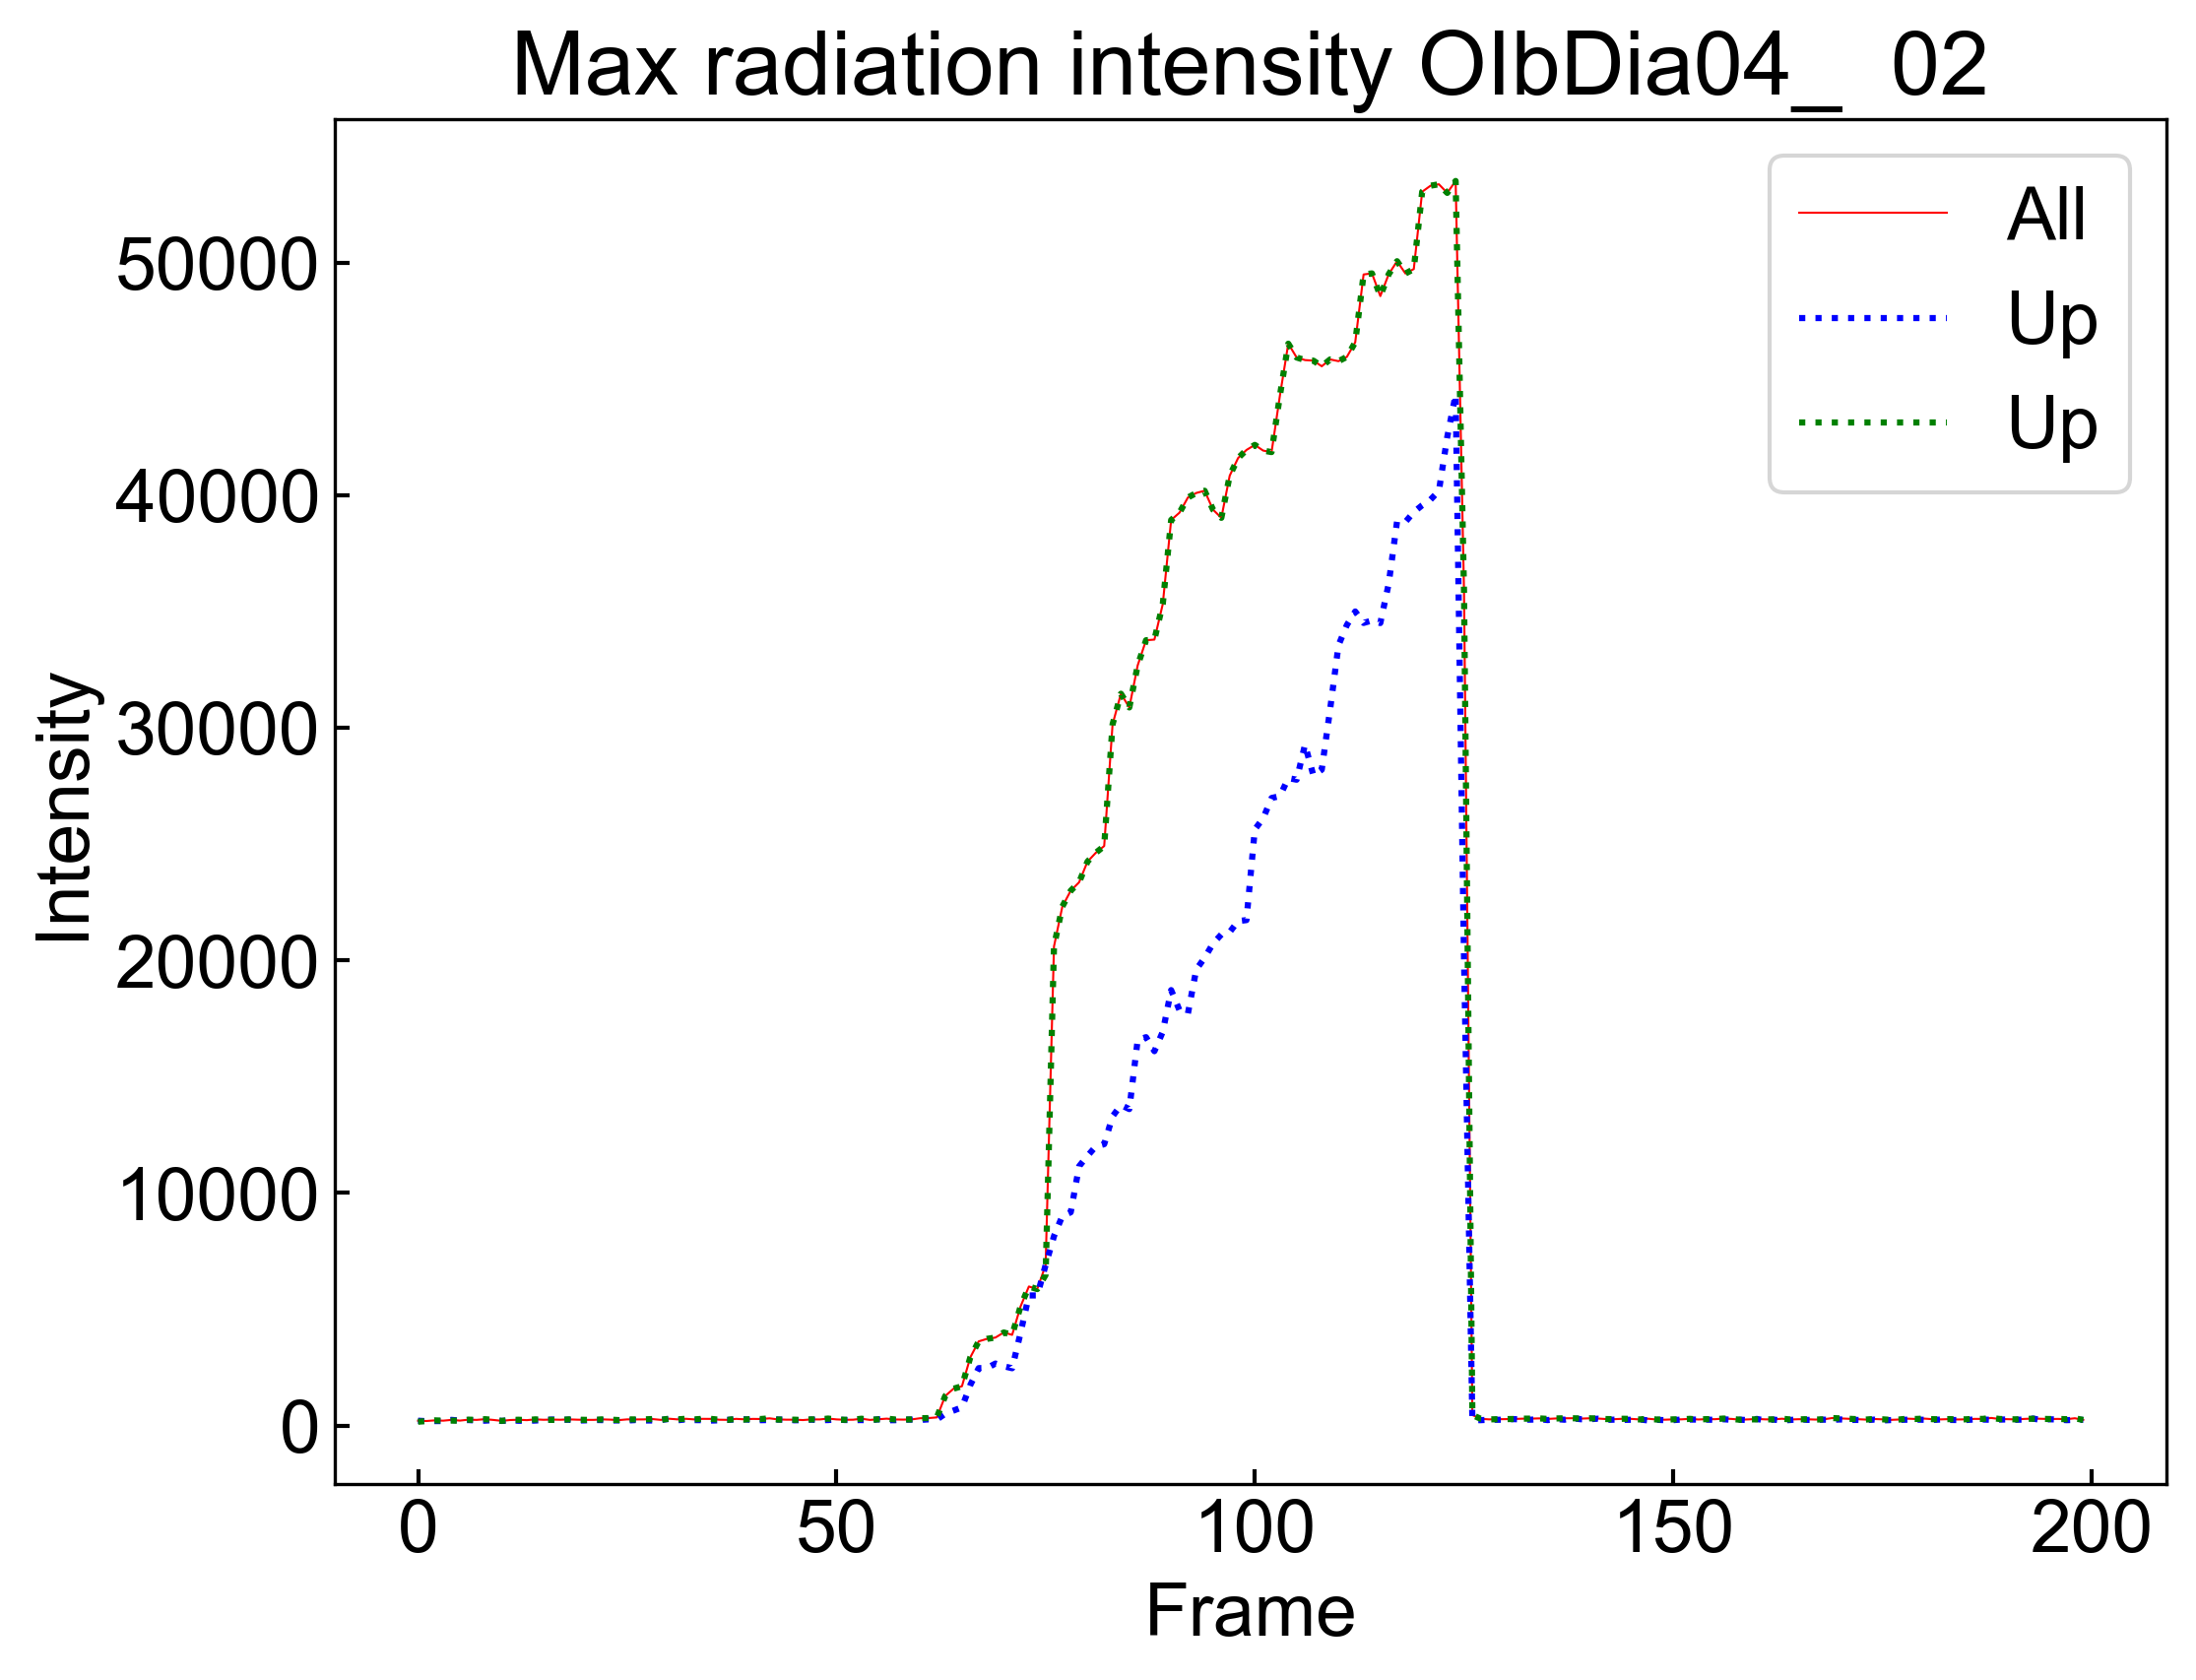

In [9]:
FigureMaker.get_max_I_figure(
    original_radiation.file_name,
    all_max_I,
    up_max_I, 
    down_max_I
)
plt.show()
plt.close()

# 処理の実装

## テストとして使うフレームを設定

In [10]:
test_frame = 120

## ずれを定量するための最大位置推定

### 最大値に点を打つ

### 非対称ガウシアンfittingで中心位置に点を打つ

## 回転処理

### 全体を一括で回転

### 上下分けてそれぞれを回転

## 回転角度と回転方法(全体か分割か)を決定

NOTE: 回転方法は、全体を何分割するかと、それぞれの回転中心をどこに置くかで決まる

## ファイルのコピー

In [11]:
# 保存先のフォルダ
path_to_save_dir = "/Users/ishizawaosamu/work/MasterThesis/test-data/spe-rotator"

# ファイル名どうする？ → {元のfilename}_{center or separate}_{回転角度}.spe
# 


In [12]:
# コピー


## コピー先のファイルに書き込み

## 差分を確認してプロット

## 回転履歴を保存

# End